In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt

In [ ]:
url = "https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv"
df = pd.read_csv(url)
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5278,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5279,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5280,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5281,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto


1. visualizzare il numero totale di record presenti nel file

In [ ]:
df["area"].count()

5283

2. visualizzare il numero di record presenti relativi ad una regione inserita dall'utente

In [ ]:
regione = input("Scrivi il nome della regione ")
df[df["nome_area"] == regione].count()["area"]

Scrivi il nome della regione Lombardia


264

3. modificare l'esercizio precedente per rispondere con un messaggio appropriato se la regione non è presente

In [ ]:
regione = input("Scrivi il nome della regione ")
if regione in df.values:
  print(df[df["nome_area"] == regione].count()["area"])
else:
  print("La regione non è presente")

Scrivi il nome della regione Lombardia
264


4. visualizzare il numero totale di vaccini consegnati in una regione inserita dall'utente

In [ ]:
regione = input("Scrivi il nome della regione ")
df[df["nome_area"] == regione]["numero_dosi"].sum()

Scrivi il nome della regione Lombardia


17274689

5. visualizzare il numero di vaccini per ogni fornitore

In [ ]:
df.groupby("fornitore")["numero_dosi"].sum()

fornitore
Janssen                     1846104
Moderna                    15235940
Pfizer/BioNTech            71327408
Vaxzevria (AstraZeneca)    11544591
Name: numero_dosi, dtype: int64

6. visualizzare il numero di vaccini per ogni fornitore di una regione inserita dall'utente. Ordinare in ordine
decrescente sul numero di vaccini

In [ ]:
regione = input("Scrivi il nome della regione ")
df[df["nome_area"] == regione].groupby("fornitore")["numero_dosi"].sum().sort_values(ascending = False)

Scrivi il nome della regione Lombardia


fornitore
Pfizer/BioNTech            12089444
Moderna                     2685369
Vaxzevria (AstraZeneca)     2190389
Janssen                      309487
Name: numero_dosi, dtype: int64

7. visualizzare le informazioni dell'esercizio 6 con un grafico a barre

Scrivi il nome della regione Lombardia


<BarContainer object of 4 artists>

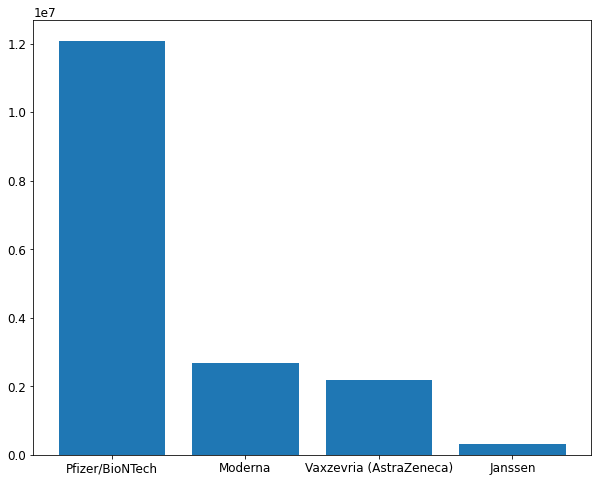

In [ ]:
regione = input("Scrivi il nome della regione ")
dosi = df[df["nome_area"] == regione].groupby("fornitore", as_index = False)["numero_dosi"].sum().sort_values('numero_dosi',ascending=False)
fig = plt.figure()
fig.set_size_inches(10,8)     
ax = plt.axes()
ax.bar(dosi["fornitore"],dosi["numero_dosi"])

8. visualizzare le informazioni dell'esercizio 6 con un grafico a torta


Scrivi il nome della regione Lombardia


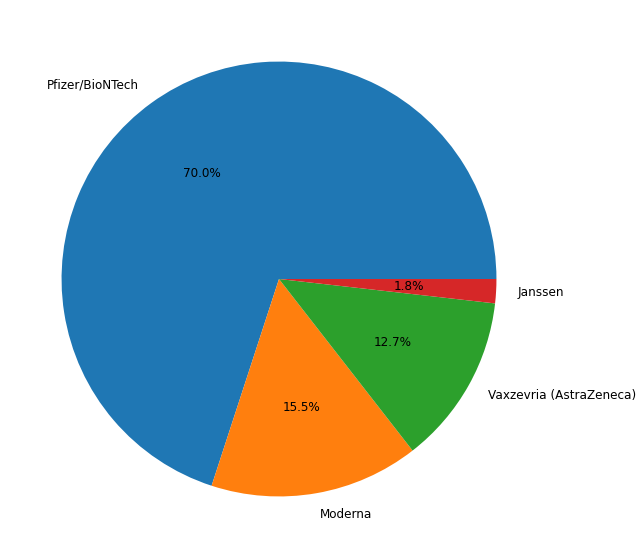

In [ ]:
regione = input("Scrivi il nome della regione ")
dosi = df[df["nome_area"] == regione].groupby("fornitore", as_index = False)["numero_dosi"].sum().sort_values('numero_dosi',ascending=False)
fig = plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 12})
ax = plt.axes()
ax.pie(dosi["numero_dosi"],labels=dosi["fornitore"],autopct='%1.1f%%')
plt.show()

9. visualizzare le informazioni dell'esercizio 6 con un grafico treemap

Scrivi il nome della regione Lombardia


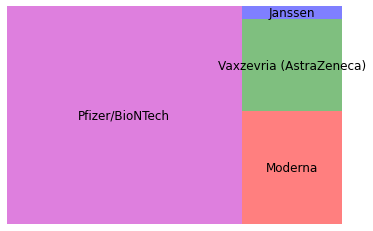

In [ ]:
import squarify
regione = input("Scrivi il nome della regione ")
dosi = df[df["nome_area"] == regione].groupby("fornitore", as_index = False)["numero_dosi"].sum().sort_values('numero_dosi',ascending=False)
squarify.plot(sizes=dosi["numero_dosi"],label=dosi["fornitore"],color=["m","r","g","b"], alpha=0.5)
plt.axis('off')
plt.show()

10. visualizzare i nomi delle tre regioni in cui sono stati consegnati più vaccini

In [ ]:
df.groupby("nome_area")["numero_dosi"].sum().sort_values(ascending = False).head(3)

nome_area
Lombardia    17274689
Lazio        10332809
Campania      9179718
Name: numero_dosi, dtype: int64

11. visualizzare i nomi delle regioni in cui sono stati consegnati un numero di vaccini inferiore alla media

In [ ]:
df.groupby("nome_area")["numero_dosi"].sum()[df.groupby("nome_area")["numero_dosi"].sum() < df.groupby("nome_area")["numero_dosi"].sum().mean()].index

Index(['Abruzzo', 'Basilicata', 'Calabria', 'Friuli-Venezia Giulia', 'Liguria',
       'Marche', 'Molise', 'Provincia Autonoma Bolzano / Bozen',
       'Provincia Autonoma Trento', 'Sardegna', 'Umbria',
       'Valle d'Aosta / Vallée d'Aoste'],
      dtype='object', name='nome_area')

12. visualizzare il grafico delle consegne dei vaccini in Lombardia e nel Lazio. Visualizzare solo i dati delle
consegne avvenute negli utlimi sei mesi. Fare in modo che la data sia determinata in modo automatico